### Importing modules


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Loading dataset

In [11]:
df=pd.read_csv('C:\\Users\\girish\\OneDrive\\Desktop\\I_P\\Iris_csv.csv')
df.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sepallength  150 non-null    float64
 1   sepalwidth   150 non-null    float64
 2   petallength  150 non-null    float64
 3   petalwidth   150 non-null    float64
 4   class        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [13]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [14]:
df.describe()

,sepallength,sepalwidth,petallength,petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Data analysis

<AxesSubplot:>

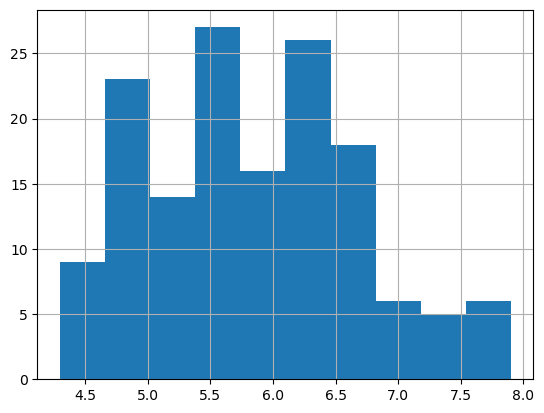

In [15]:
df['sepallength'].hist()

<AxesSubplot:>

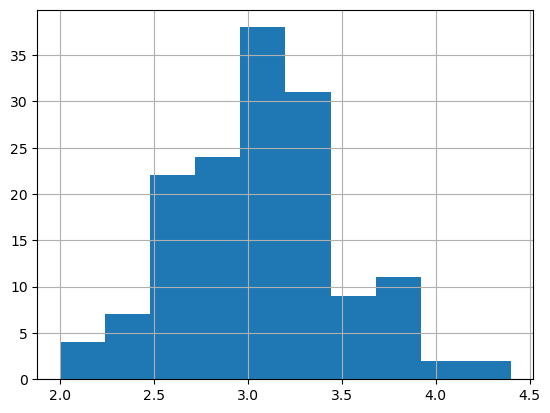

In [16]:
df['sepalwidth'].hist()

<AxesSubplot:>

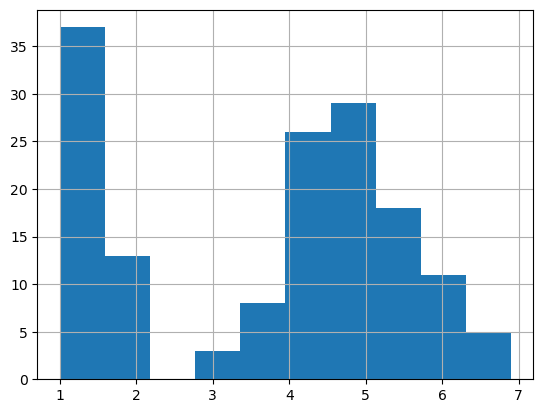

In [17]:
df['petallength'].hist()

<AxesSubplot:>

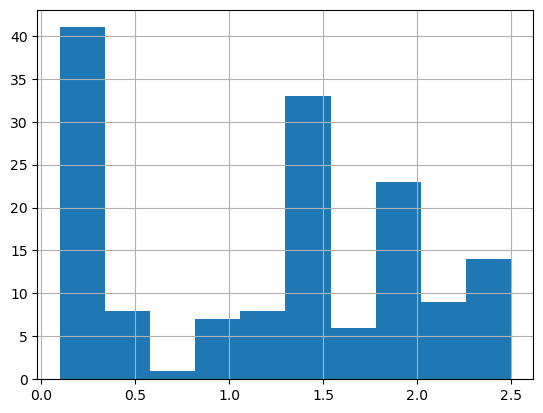

In [18]:
df['petalwidth'].hist()

In [19]:
colours=['red','orange','blue']
classes=['Iris-setosa','Iris-versicolor','Iris-virginica']


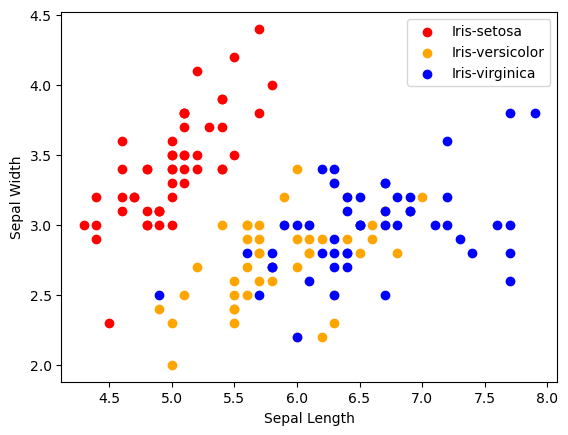

In [20]:
#sepal length vs sepal width
for i in range(3):
    x=df[df['class']==classes[i]]
    plt.scatter(x['sepallength'],x['sepalwidth'],c=colours[i],label=classes[i])
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

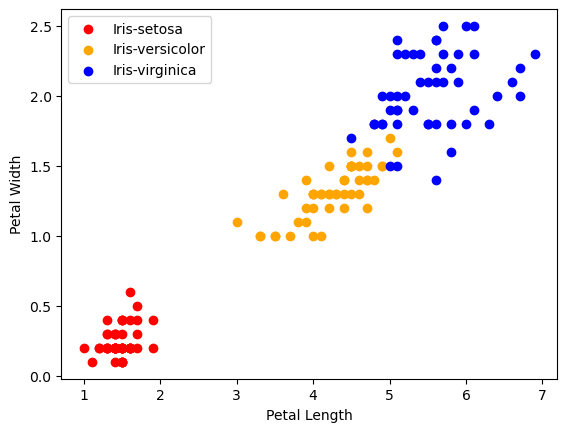

In [21]:
#petal length vs petal width
for i in range(3):
    x=df[df['class']==classes[i]]
    plt.scatter(x['petallength'],x['petalwidth'],c=colours[i],label=classes[i])
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

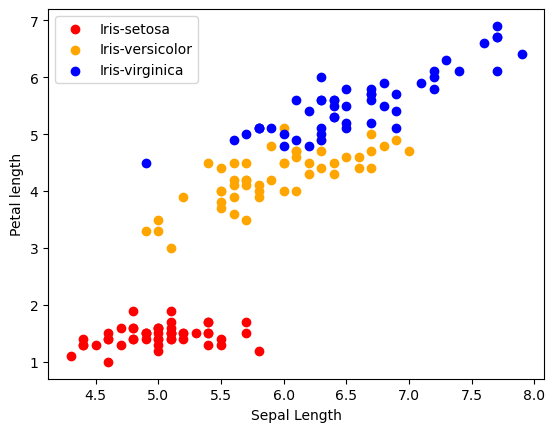

In [22]:

#sepal length vs petal length
for i in range(3):
    x=df[df['class']==classes[i]]
    plt.scatter(x['sepallength'],x['petallength'],c=colours[i],label=classes[i])
plt.xlabel('Sepal Length')
plt.ylabel('Petal length')
plt.legend()
plt.show()


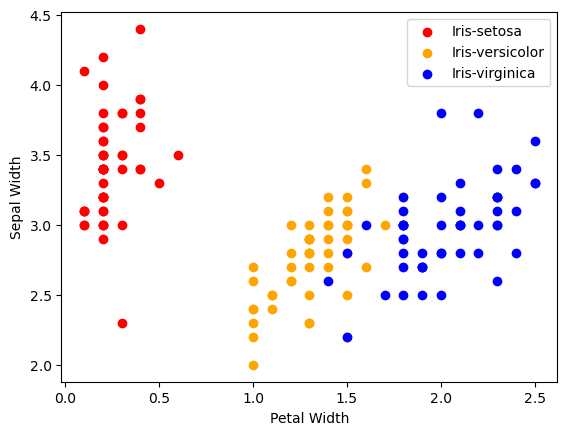

In [23]:
#petal width vs sepal width
for i in range(3):
    x=df[df['class']==classes[i]]
    plt.scatter(x['petalwidth'],x['sepalwidth'],c=colours[i],label=classes[i])
plt.xlabel('Petal Width')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

### Correlation matrix

<AxesSubplot:>

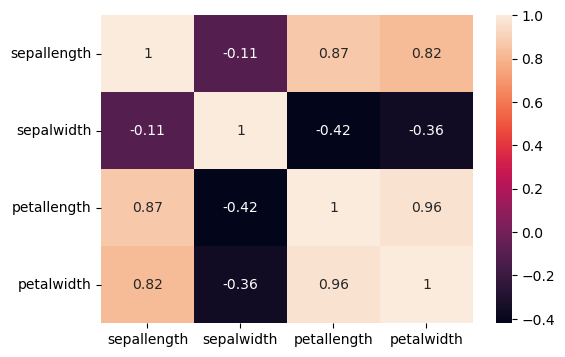

In [24]:
corr=df.corr()
fig,ax=plt.subplots(figsize=(6,4))
sns.heatmap(corr,annot=True,ax=ax)

### Splitting dataset

In [25]:
from sklearn.model_selection import train_test_split
df1=df.drop(columns=['class'])
x=df1
y=df['class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

### Model Building

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [27]:
model=LogisticRegression()
model.fit(x_train.values,y_train.values)

LogisticRegression()

In [28]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  96.66666666666667


C:\Users\girish\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [29]:
model=KNeighborsClassifier()
model.fit(x_train.values,y_train.values)

KNeighborsClassifier()

In [30]:
print("Accuracy: ",model.score(x_test,y_test)*100)

Accuracy:  100.0


C:\Users\girish\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [31]:
import pickle
filename = 'saved_model.pkl'
try:
    with open(filename, 'wb') as file:
        pickle.dump(model, file)
    print("Model saved")
except Exception as e:
    print(f"Error saving the model: {e}")

Model saved


In [32]:
ld_model=pickle.load(open(filename,'rb'))
ld_model.predict([[5,2,3.5,1]])

array(['Iris-versicolor'], dtype=object)